<a href="https://colab.research.google.com/github/Pernach/Nomoto/blob/analytics/Nomoto_Diagnostics_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исходные данные
## Описание файла


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/data/Diagnostics/Nomoto

Mounted at /content/drive
/content/drive/My Drive/data/Diagnostics/Nomoto


In [ ]:
import pandas as pd
import glob

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
files = glob.glob('*.csv')

In [ ]:
data = []
#data = pd.read_csv(file[0])
for file in files:
  if(file != 'data_model.csv'):
      data.append(pd.read_csv(file, usecols = ['u1', 'y1', 'y2', 'y_nominal1', 'y_nominal2', 'fault_u1',
       'fault_y1', 'fault_y2', 'comp_fault']))


In [ ]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   u1          5000 non-null   float64
 1   y1          5000 non-null   float64
 2   y2          5000 non-null   float64
 3   y_nominal1  5000 non-null   float64
 4   y_nominal2  5000 non-null   float64
 5   fault_u1    5000 non-null   float64
 6   fault_y1    5000 non-null   float64
 7   fault_y2    5000 non-null   float64
 8   comp_fault  5000 non-null   float64
dtypes: float64(9)
memory usage: 351.7 KB


In [ ]:
data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   u1          5000 non-null   float64
 1   y1          5000 non-null   float64
 2   y2          5000 non-null   float64
 3   y_nominal1  5000 non-null   float64
 4   y_nominal2  5000 non-null   float64
 5   fault_u1    5000 non-null   float64
 6   fault_y1    5000 non-null   float64
 7   fault_y2    5000 non-null   float64
 8   comp_fault  5000 non-null   float64
dtypes: float64(9)
memory usage: 351.7 KB


In [ ]:
data[79].tail()

,u1,y1,y2,y_nominal1,y_nominal2,fault_u1,fault_y1,fault_y2,comp_fault
4995,-0.404861,-1.622259,-1.508909,-1.596626,-1.596626,0.0,0.0,1.0,0.0
4996,-0.404861,-1.234299,-1.508909,-1.199371,-1.199371,0.0,0.0,1.0,0.0
4997,-0.404861,-1.610808,-1.508909,-1.596626,-1.596626,0.0,0.0,1.0,0.0
4998,-0.404861,-1.241647,-1.508909,-1.199371,-1.199371,0.0,0.0,1.0,0.0
4999,-0.404861,-1.607999,-1.508909,-1.596626,-1.596626,0.0,0.0,1.0,0.0


In [ ]:
u1 = []
y1 = []
y2 = []
comp = []
for s in range(len(data)):
  df = data[s].loc[data[s]['fault_u1'] != 0]
  if (df.empty != True):
    u1.append(s)
  df = data[s].loc[data[s]['fault_y1'] != 0]
  if (df.empty != True):
    y1.append(s)
  df = data[s].loc[data[s]['fault_y2'] != 0]
  if (df.empty != True):
    y2.append(s)
  df = data[s].loc[(data[s]['fault_y2'] != 0) & (data[s]['fault_y1'] != 0)]
  if (df.empty != True):
    comp.append(s)

In [ ]:
print(y1)

[39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 118, 119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 197, 199, 200, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239]


In [ ]:
print(y2)

[79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 124, 128, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 201, 202, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]


Пустой столбец?

In [ ]:
def make_features(df, max_lag, rolling_mean_first_size, count_rolling):
    df_res = df.copy()
    # Добавляем n задержек
    for lag in range(1, max_lag + 1):
        df_res['y1_lag_{}'.format(lag)] = df_res['y1'].shift(lag)
        df_res['y2_lag_{}'.format(lag)] = df_res['y2'].shift(lag)
        df_res['y_nominal1_lag_{}'.format(lag)] = df_res['y_nominal1'].shift(lag)
        df_res['y_nominal2_lag_{}'.format(lag)] = df_res['y_nominal2'].shift(lag)
# Добавляем скользящее среднее
    df_cols = ['y1',	'y2',	'y_nominal1',	'y_nominal2']
    for counts in range(1, (count_rolling + 1)):
      for rol in range(len(df_cols)):
        s = df_cols[rol]+'_rolling_mean_{}'.format(rolling_mean_first_size*counts)
        df_res[s] = df_res[df_cols[rol]].shift().rolling(rolling_mean_first_size*counts).mean()
        # Первая производная
    if (max_lag > 0):
      df_res['Vy1'] = df_res['y1'] - df_res['y1_lag_1']
      df_res['Vy2'] = df_res['y2'] - df_res['y2_lag_1']
      df_res['Vy_nominal1'] = df_res['y_nominal1'] - df_res['y_nominal1_lag_1']
      df_res['Vy_nominal2'] = df_res['y_nominal2'] - df_res['y_nominal2_lag_1']
    if (max_lag > 1): # Вторая производная
      df_res['Ay1'] = df_res['Vy1'] - (df_res['y1_lag_1'] - df_res['y1_lag_2'])
      df_res['Ay2'] = df_res['Vy2'] - (df_res['y2_lag_1'] - df_res['y2_lag_2'])
      df_res['Ay_nominal1'] = df_res['Vy_nominal1'] - (df_res['y_nominal1_lag_1'] - df_res['y_nominal1_lag_2'])
      df_res['Ay_nominal2'] = df_res['Vy_nominal2'] - (df_res['y_nominal2_lag_1'] - df_res['y_nominal2_lag_2'])
    if (max_lag > 2): # Третья производная
      df_res['jy1'] = df_res['Ay1'] - (df_res['y1_lag_1'] - 2*df_res['y1_lag_2'] + df_res['y1_lag_3'])
      df_res['jy2'] = df_res['Ay2'] - (df_res['y2_lag_1'] - 2*df_res['y2_lag_2'] + df_res['y2_lag_3'])
      df_res['jy_nominal1'] = df_res['Ay_nominal1'] - (df_res['y_nominal1_lag_1'] - 2*df_res['y_nominal1_lag_2'] + df_res['y_nominal1_lag_3'])
      df_res['jy_nominal2'] = df_res['Ay_nominal2'] - (df_res['y_nominal2_lag_1'] - 2*df_res['y_nominal2_lag_2'] + df_res['y_nominal2_lag_3'])

    df_res = df_res.dropna().reset_index(drop=True)
    return df_res

In [ ]:
data_work = []
for df1 in data:
  data_work.append(make_features(df1, 2, 5, 2))

In [ ]:
for df1 in data_work:
  df1['fault_y1'] = df1['fault_y1'].astype(int)
  df1['fault_y2'] = df1['fault_y2'].astype(int)
  df1['comp_fault'] = df1['comp_fault'].astype(int)

Сведем неисправности в один столбец, присвоив u1 = 1, y1 = 2, y2 = 3

In [ ]:
for df1 in data_work:
  for j in range(len(df1['fault_y1'])):
    if (df1['fault_y1'][j] != 0):
      df1['comp_fault'][j] = 2
  for k in range(len(df1['fault_y2'])):
    if (df1['fault_y2'][k] != 0):
      df1['comp_fault'][k] = 3

<ipython-input-16-4482a4470243>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['comp_fault'][j] = 2
<ipython-input-16-4482a4470243>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['comp_fault'][k] = 3


In [ ]:
data_work[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   u1                          4990 non-null   float64
 1   y1                          4990 non-null   float64
 2   y2                          4990 non-null   float64
 3   y_nominal1                  4990 non-null   float64
 4   y_nominal2                  4990 non-null   float64
 5   fault_u1                    4990 non-null   float64
 6   fault_y1                    4990 non-null   int64  
 7   fault_y2                    4990 non-null   int64  
 8   comp_fault                  4990 non-null   int64  
 9   y1_lag_1                    4990 non-null   float64
 10  y2_lag_1                    4990 non-null   float64
 11  y_nominal1_lag_1            4990 non-null   float64
 12  y_nominal2_lag_1            4990 non-null   float64
 13  y1_lag_2                    4990 

In [ ]:
s = 79
data_work[s].loc[data_work[s]['fault_y2'] != 0]

,u1,y1,y2,y_nominal1,y_nominal2,fault_u1,fault_y1,fault_y2,comp_fault,y1_lag_1,...,y_nominal1_rolling_mean_10,y_nominal2_rolling_mean_10,Vy1,Vy2,Vy_nominal1,Vy_nominal2,Ay1,Ay2,Ay_nominal1,Ay_nominal2
2918,-0.404861,-1.154822,-1.508909,-1.199371,-1.199371,0.0,0,1,3,-1.637468,...,-1.397998,-1.397998,0.482646,0.0,0.397255,0.397255,0.899821,0.244427,0.79451,0.79451
2919,-0.404861,-1.613418,-1.508909,-1.596626,-1.596626,0.0,0,1,3,-1.154822,...,-1.397998,-1.397998,-0.458596,0.0,-0.397255,-0.397255,-0.941242,0.000000,-0.79451,-0.79451
2920,-0.404861,-1.249630,-1.508909,-1.199371,-1.199371,0.0,0,1,3,-1.613418,...,-1.397998,-1.397998,0.363788,0.0,0.397255,0.397255,0.822385,0.000000,0.79451,0.79451
2921,-0.404861,-1.623754,-1.508909,-1.596626,-1.596626,0.0,0,1,3,-1.249630,...,-1.397998,-1.397998,-0.374124,0.0,-0.397255,-0.397255,-0.737912,0.000000,-0.79451,-0.79451
2922,-0.404861,-1.234554,-1.508909,-1.199371,-1.199371,0.0,0,1,3,-1.623754,...,-1.397998,-1.397998,0.389199,0.0,0.397255,0.397255,0.763323,0.000000,0.79451,0.79451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,-0.404861,-1.622259,-1.508909,-1.596626,-1.596626,0.0,0,1,3,-1.184488,...,-1.397998,-1.397998,-0.437770,0.0,-0.397255,-0.397255,-0.835910,0.000000,-0.79451,-0.79451
4986,-0.404861,-1.234299,-1.508909,-1.199371,-1.199371,0.0,0,1,3,-1.622259,...,-1.397998,-1.397998,0.387960,0.0,0.397255,0.397255,0.825730,0.000000,0.79451,0.79451
4987,-0.404861,-1.610808,-1.508909,-1.596626,-1.596626,0.0,0,1,3,-1.234299,...,-1.397998,-1.397998,-0.376509,0.0,-0.397255,-0.397255,-0.764469,0.000000,-0.79451,-0.79451
4988,-0.404861,-1.241647,-1.508909,-1.199371,-1.199371,0.0,0,1,3,-1.610808,...,-1.397998,-1.397998,0.369161,0.0,0.397255,0.397255,0.745670,0.000000,0.79451,0.79451


In [ ]:
data_model = pd.DataFrame()
for df in data_work:
  data_model = pd.concat([data_model, df], ignore_index = True)
data_model

,u1,y1,y2,y_nominal1,y_nominal2,fault_u1,fault_y1,fault_y2,comp_fault,y1_lag_1,...,y_nominal1_rolling_mean_10,y_nominal2_rolling_mean_10,Vy1,Vy2,Vy_nominal1,Vy_nominal2,Ay1,Ay2,Ay_nominal1,Ay_nominal2
0,0.200844,0.773660,0.537258,0.776399,0.594987,0.0,0,0,0,0.645852,...,0.767740,0.693522,0.127808,-0.311517,0.030249,-0.197071,0.239785,-0.556722,0.066922,-0.394142
1,0.200844,0.823533,0.872957,0.749433,0.792058,0.0,0,0,0,0.773660,...,0.764251,0.693522,0.049873,0.335699,-0.026966,0.197071,-0.077935,0.647215,-0.057216,0.394142
2,0.200844,0.771183,0.595288,0.770229,0.594987,0.0,0,0,0,0.823533,...,0.766113,0.693522,-0.052350,-0.277669,0.020796,-0.197071,-0.102223,-0.613367,0.047762,-0.394142
3,0.200844,0.732715,0.841010,0.752520,0.792058,0.0,0,0,0,0.771183,...,0.762763,0.693522,-0.038468,0.245722,-0.017708,0.197071,0.013881,0.523390,-0.038504,0.394142
4,0.200844,0.739936,0.648055,0.764299,0.594987,0.0,0,0,0,0.732715,...,0.764514,0.693522,0.007222,-0.192955,0.011779,-0.197071,0.045690,-0.438676,0.029488,-0.394142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397195,-0.109263,0.591241,-0.645739,0.489006,0.019981,0.0,0,3,3,0.008727,...,0.258025,0.140034,0.582513,0.000000,0.412417,-0.163338,1.062899,0.000000,0.815689,-0.304848
1397196,-0.115611,0.143219,-0.645739,0.085824,0.176849,0.0,0,3,3,0.591241,...,0.263386,0.129227,-0.448022,0.000000,-0.403182,0.156868,-1.030535,0.000000,-0.815599,0.320205
1397197,-0.121765,0.467742,-0.645739,0.497329,-0.001880,0.0,0,3,3,0.143219,...,0.268117,0.126310,0.324523,0.000000,0.411506,-0.178729,0.772544,0.000000,0.814688,-0.335597
1397198,-0.127714,0.047647,-0.645739,0.094914,0.170082,0.0,0,3,3,0.467742,...,0.273084,0.115450,-0.420095,0.000000,-0.402415,0.171962,-0.744617,0.000000,-0.813921,0.350691


In [ ]:
data_model.drop(['fault_u1',	'fault_y1',	'fault_y2'], axis = 1, inplace = True)
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397200 entries, 0 to 1397199
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   u1                          1397200 non-null  float64
 1   y1                          1397200 non-null  float64
 2   y2                          1397200 non-null  float64
 3   y_nominal1                  1397200 non-null  float64
 4   y_nominal2                  1397200 non-null  float64
 5   comp_fault                  1397200 non-null  int64  
 6   y1_lag_1                    1397200 non-null  float64
 7   y2_lag_1                    1397200 non-null  float64
 8   y_nominal1_lag_1            1397200 non-null  float64
 9   y_nominal2_lag_1            1397200 non-null  float64
 10  y1_lag_2                    1397200 non-null  float64
 11  y2_lag_2                    1397200 non-null  float64
 12  y_nominal1_lag_2            1397200 non-null  float64
 1

In [ ]:
data_model.to_csv('data_model.csv', index=False)

In [ ]:
def _heatmap(df):
  df_corr = df.copy()
  df_corr.drop('comp_fault', axis = 1, inplace = True)
  cor = df_corr.corr()
  plt.figure(figsize = (10, 10))
  sns.heatmap(cor)
  plt.show
  del df_corr

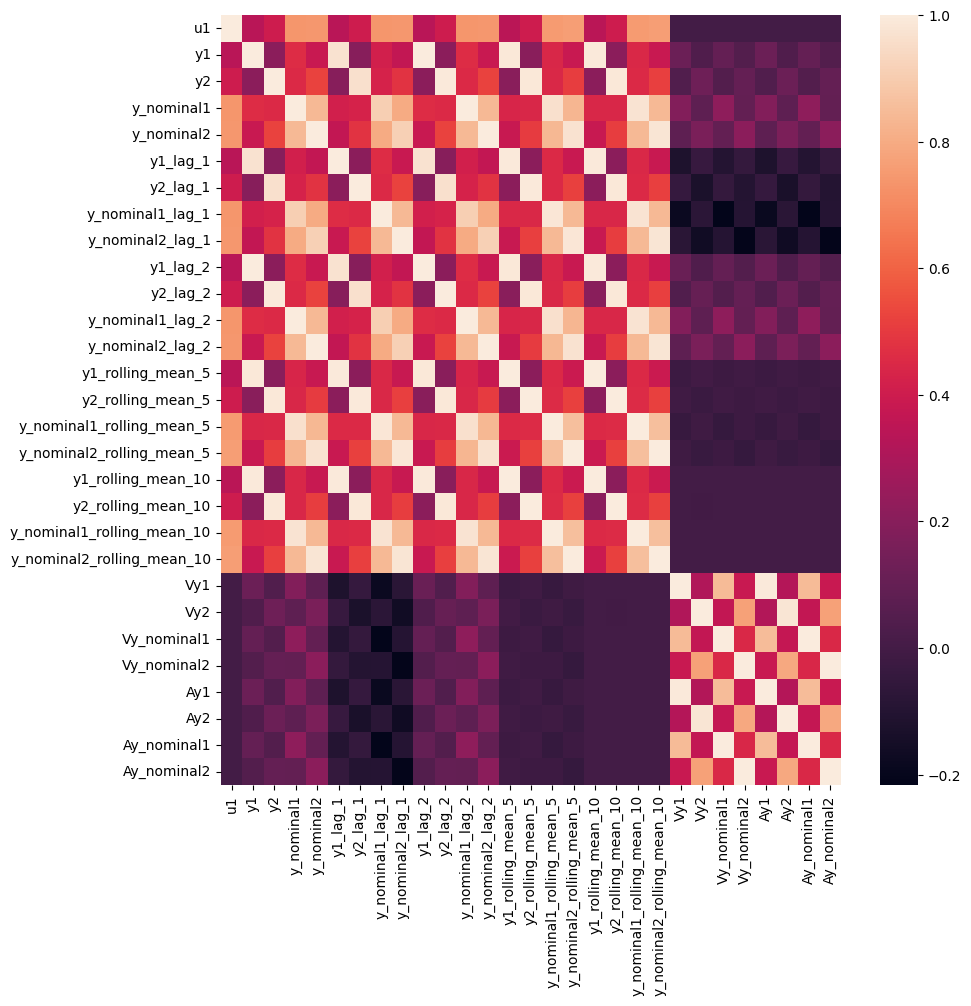

In [ ]:
_heatmap(data_model)

Есть малокоррелирующие признаки, но не так много, интересно будет посмотреть после построения модели на значимость признаков.

In [ ]:
def _boxplot(df):
  df_box = df.copy()
  df_box.drop('comp_fault', axis = 1, inplace = True)
  plt.figure(figsize = (25, 10))
  sns.boxplot(df_box)
  del df_box

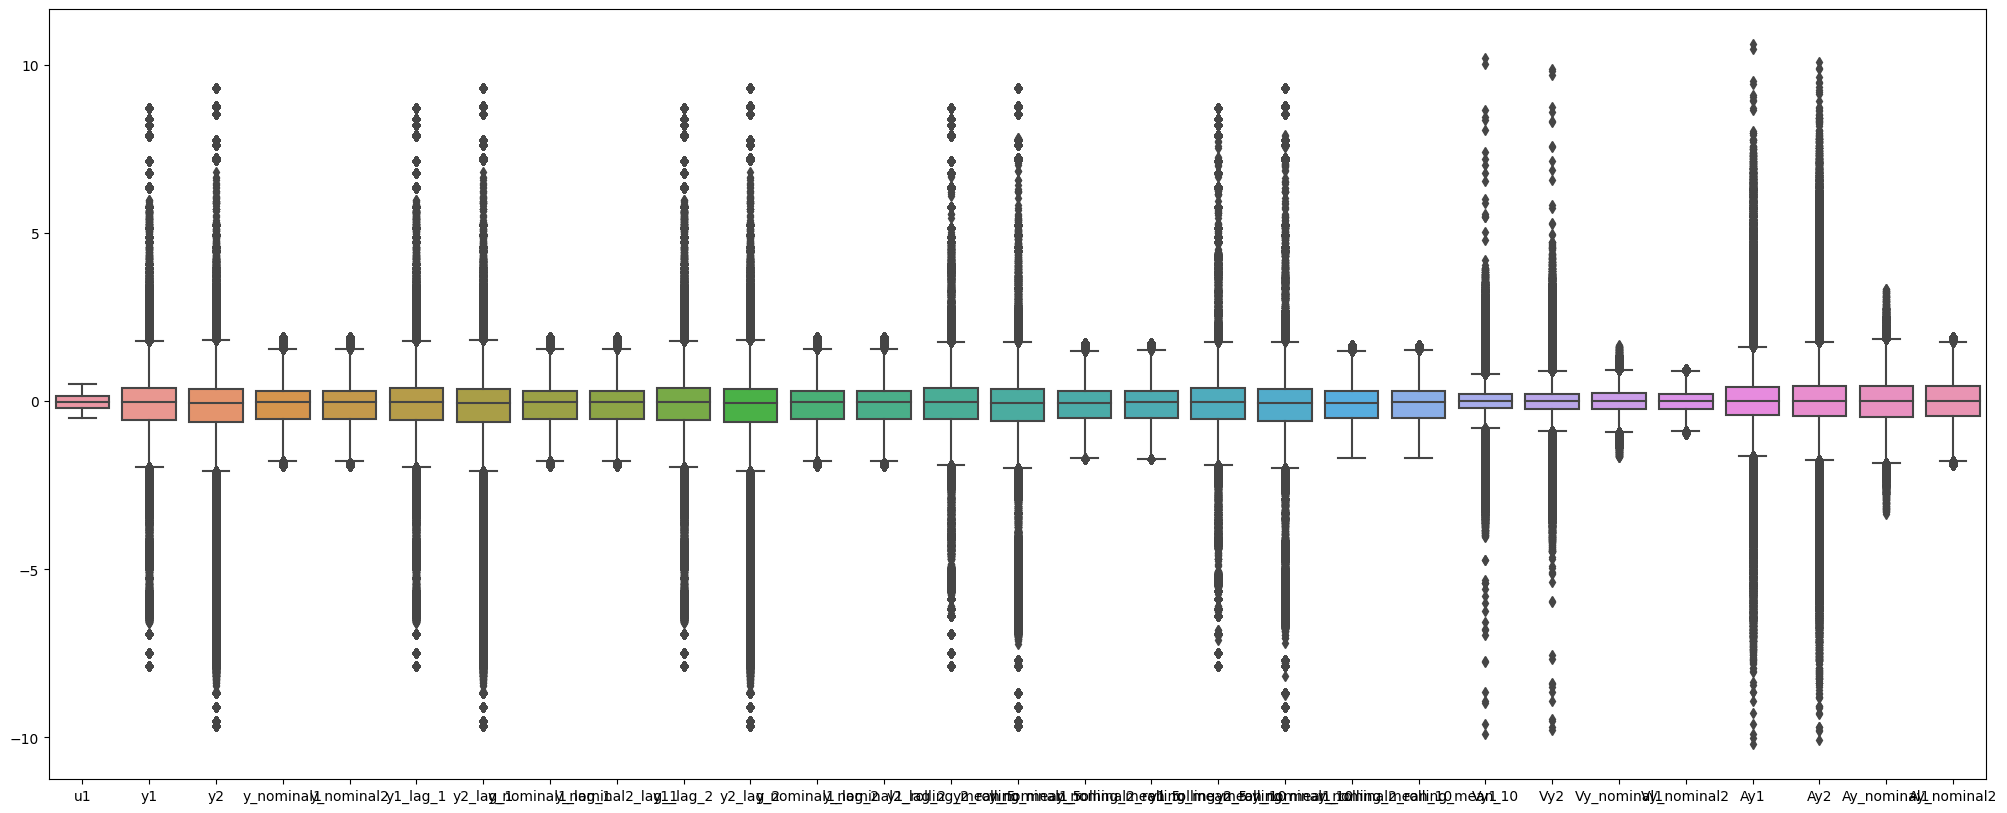

In [ ]:
_boxplot(data_model)

Все диаграммы размаха показывают близкие к нулю медианы, однако довольно много выбросов, что интересно для задачи.